# Dammann Gratings

In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

from matplotlib import pyplot as plt 
import numpy as np 

from scipy.constants import micro, nano, milli

import pyMOE as moe 
from pyMOE.generate import *  

from scipy import ndimage

In [2]:



def clip_remainder(x, clip):
    if isinstance(clip, tuple):
        print("is tuple")
        assert len(clip) == 2, "Clip should be (min, max)"
        clipmin,clipmax = clip
    else:
        clipmin = -clip
        clipmax = clip
    clipptp = np.ptp([clipmin, clipmax])


    xaux = x
    xaux = xaux-clipmin

    xaux = np.remainder(xaux, clipptp)
    xaux = xaux+clipmin
    return xaux


def dammann_grating(x, transitions):
    x = clip_remainder(x, 0.5)
    assert np.ptp(transitions)<=1, "transitions"
    xaux = np.abs(x)
#     print(transitions)
    y = np.zeros(x.shape)
    for i,ti in enumerate(range(1,len(transitions))):
        idx = np.where((xaux<=transitions[ti]) & (xaux>=transitions[ti-1]))

        y[idx] = np.power(-1,ti+1)

#         print(i)
        
    return y




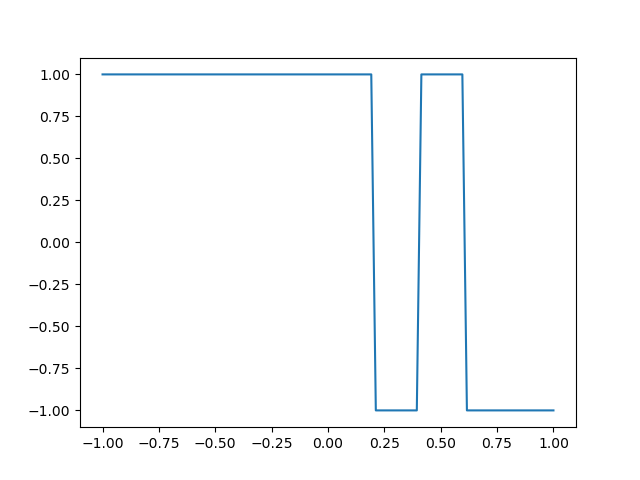

In [35]:
def alternate_transitions(x, transitions, start_value=1):
    y = np.full_like(x, start_value)
    for i in range(len(transitions)-1):
        mask = np.logical_and(x >= transitions[i], x < transitions[i+1])
        y[mask] = start_value * (-1) ** (i+1)
    mask = x >= transitions[-1]  # Add this line to handle the last transition
    y[mask] = start_value * (-1) ** len(transitions)
    return y

x = np.linspace(-1, 1, 100)
transitions = [0.2, 0.4, 0.6]

y = alternate_transitions(x, transitions)
plt.plot(x, y)




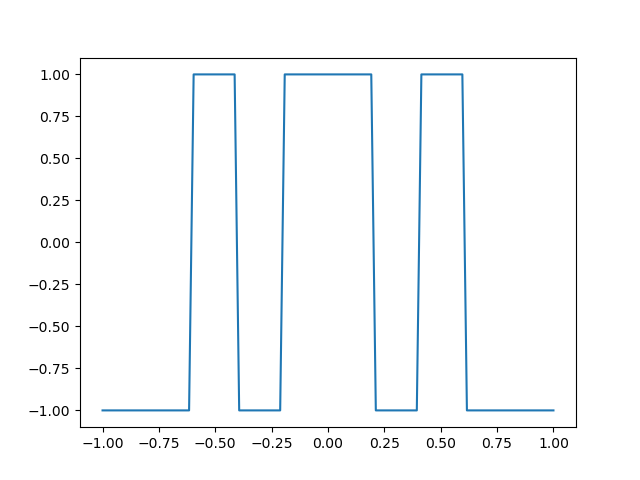

In [55]:
def alternate_transitions_symmetric(x, transitions, start_value=1):
    assert np.all(np.diff(transitions) > 0), "transitions should be monotonic increasing"
    y = np.full_like(x, start_value)
    for i in range(len(transitions)-1):
        mask = np.logical_and(abs(x) >= transitions[i], abs(x) < transitions[i+1])
        y[mask] = start_value * (-1) ** (i+1)
    mask = abs(x) >= transitions[-1]  # Add this line to handle the last transition
    y[mask] = start_value * (-1) ** len(transitions)
    return y

x = np.linspace(-1, 1, 100)
transitions = [0.2, 0.4, 0.6]

y = alternate_transitions(x, transitions)
plt.plot(x, y)



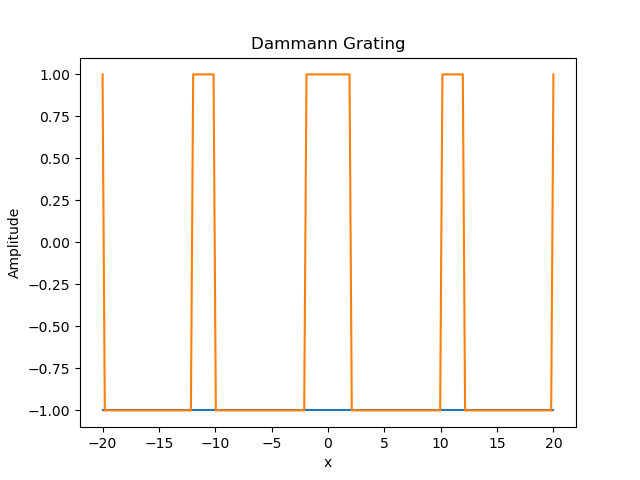

In [82]:


def dammann_grating_element(x,transitions, start_value=1):
    assert np.all(np.array(transitions)<=0.5), "transitions should be <= 0.5"

    y = alternate_transitions_symmetric(x,transitions=transitions, start_value=start_value)
    return y



def dammann_grating_periodic(x,transitions, period=1, start_value=1):
    # assert np.all(np.array(transitions)<=0.5), "transitions should be <= 0.5"

    transitions = np.array(transitions)*period
    # x = clip_remainder(x, period)
    half_period = period/2
    x = np.mod(np.abs(x+half_period), period)-half_period

    y = alternate_transitions_symmetric(x,transitions=transitions, start_value=start_value)
    return y

x = np.linspace(-20, 20, 200)
transitions = [0.1]

y = dammann_grating_element(x, transitions)
plt.plot(x, y)


period = 20
y = dammann_grating_periodic(x, transitions, period=period)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Dammann Grating')
plt.show()



In [ ]:

def scaled_transitions(transitions, period):
    return [t * period for t in transitions]

def calculate_alternate_transitions(x, transitions, period):
    scaled_transitions = scaled_transitions(transitions, period)
    y = np.zeros_like(x)
    for i in range(len(scaled_transitions)):
        mask = np.logical_and(np.abs(x) >= i * period, np.abs(x) < (i + 1) * period)
        y[mask] = alternate_transitions_symmetric(x[mask], scaled_transitions[i])
    return y

x = np.linspace(-10, 10, 100)
period = 2
transitions = [0.2, 0.4, 0.45]

y = calculate_alternate_transitions(x, transitions, period)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Dammann Grating')
plt.show()


In [ ]:


def repeat_dammann_grating(x, period):
    transitions = [0.2, 0.4, 0.45]  # Transitions for the Dammann grating element
    element_period = 1  # Period of the Dammann grating element

    # Calculate the number of repetitions needed to reach the desired period
    num_repetitions = int(period / element_period)

    # Create the repeated array by tiling the Dammann grating element
    repeated_array = np.tile(dammann_grating_element(x, transitions), num_repetitions)

    return repeated_array


x1 = np.linspace(-10,10)
y1 = repeat_dammann_grating(x1, 10)
plt.plot(y1)

array([ 0. ,  0.2,  0.4, -0.4, -0.2,  0. ,  0.2,  0.4, -0.4, -0.2,  0. ])

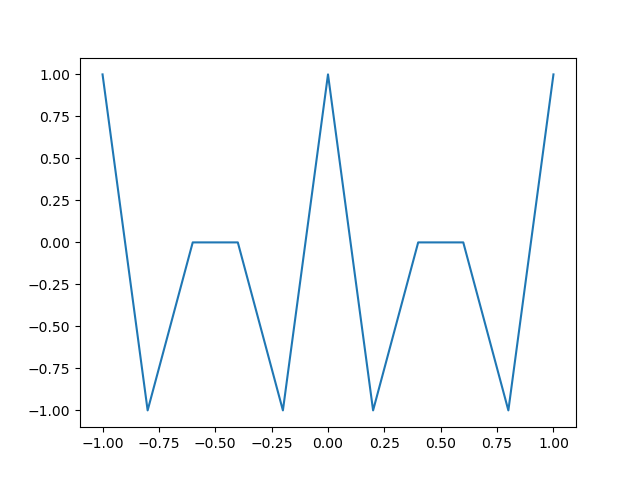

In [7]:
%reload_ext autoreload
%autoreload 2


x = np.linspace(-1,1,11)
y = moe.sag.dammann_grating(x, transitions=[0,0.1,0.3])

plt.plot(x, y)
clip_remainder(x,0.5)
